In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('farmer.csv')

In [3]:
df.head()  

# N -> Nitrogen
# P -> Phoshorus
# K -> Potassium

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
x = df.drop('label', axis=1)
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


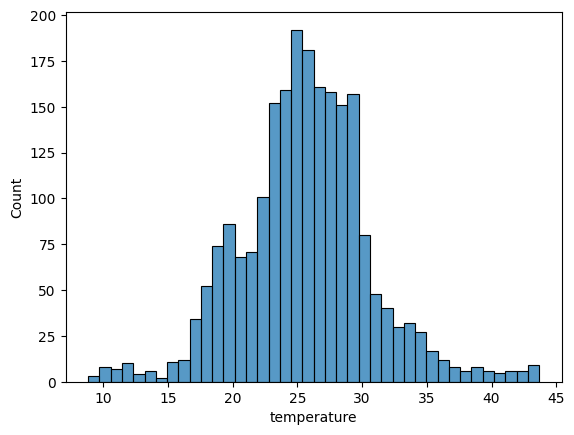

In [9]:
sns.histplot(x='temperature', data=x)
plt.show()

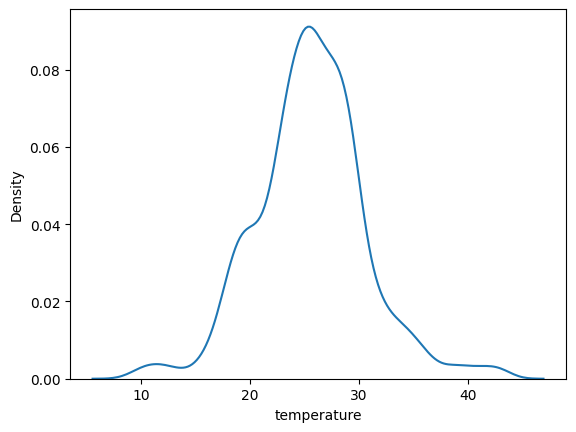

In [10]:
sns.kdeplot(x='temperature', data=x)
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
std = StandardScaler()

In [13]:
x2 = x.values
x2[0]

array([ 90.        ,  42.        ,  43.        ,  20.87974371,
        82.00274423,   6.50298529, 202.9355362 ])

In [14]:
x_transformed = std.fit_transform(x2)
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [15]:
a = pd.DataFrame(x_transformed)
a

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [16]:
a.describe()

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00


In [17]:
print(a[0].mean())  # this in encoded form

-1.0335167065601457e-16


In [18]:
format(a[0].mean(), '.20f')  # this is in decode form, the average of every column is zero

'-0.00000000000000010335'

In [19]:
print(a[0].std())  # the standard deviation of every column is one

1.0002273502359715


In [20]:
from sklearn.cluster import KMeans

In [21]:
km = KMeans(n_clusters=10)
km.fit(x_transformed)

KMeans(n_clusters=10)

In [22]:
km.labels_

array([9, 9, 9, ..., 9, 2, 2])

In [23]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [24]:
df['group'] = km.labels_
df

,N,P,K,temperature,humidity,ph,rainfall,label,group
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,9
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,9
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,9
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,9
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,9
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,9
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,9
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2


In [25]:
df['group'].value_counts()

group
1    404
6    303
9    270
2    246
3    200
5    200
7    187
4    178
0    106
8    106
Name: count, dtype: int64

In [26]:
fourth_grp = df[df['group']==4]
fourth_grp['label'].value_counts()

label
pomegranate    100
orange          71
coconut          5
lentil           1
papaya           1
Name: count, dtype: int64

In [27]:
sixth_grp = df[df['group'] == 6]
sixth_grp['label'].value_counts()

label
kidneybeans    96
pigeonpeas     80
mango          78
mothbeans      42
lentil          7
Name: count, dtype: int64

In [28]:
wcss = []
for i in range(5,50):
    km = KMeans(n_clusters=i)
    km.fit(x_transformed)
    wcss.append(km.inertia_)

In [29]:
wcss  # wcss -> within a cluster sum of squares
clusters = list(range(5,50))
clusters

[5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

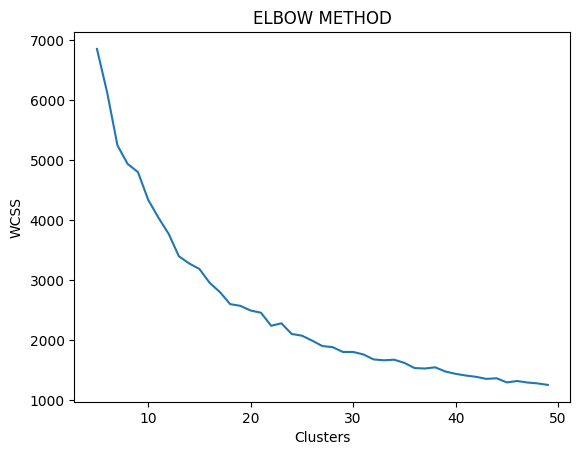

In [30]:
sns.lineplot(x=clusters, y=wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('ELBOW METHOD')
plt.show()

In [31]:
km = KMeans(n_clusters=15)
km.fit(x_transformed)

KMeans(n_clusters=15)

In [32]:
km.labels_

array([ 9,  9,  9, ..., 11, 11, 11])

In [33]:
x_transformed.shape

(2200, 7)

In [34]:
df['group_15'] = km.labels_
df

,N,P,K,temperature,humidity,ph,rainfall,label,group,group_15
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,9,9
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,9,9
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,9,9
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,9,9
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,9,9
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,9,11
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,2,11
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,9,11
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,2,11


In [35]:
df['group_15'].value_counts()

group_15
8     372
9     208
12    203
3     200
2     164
5     160
6     138
7     128
11    112
0     109
1     105
10    104
4      94
13     67
14     36
Name: count, dtype: int64

In [36]:
def find_label(grp_no):
    grp = df[df['group_15'] == grp_no]
    return list(grp['label'].value_counts().keys())

In [37]:
find_label(7)

['coconut', 'orange', 'pomegranate', 'pigeonpeas', 'papaya']

In [38]:
find_label(10)

['mango', 'mothbeans', 'pigeonpeas']

In [39]:
import joblib

In [40]:
joblib.dump(km,'kmeans_model.lb')

['kmeans_model.lb']

In [41]:
joblib.dump(std,'standard_scaler.lb')

['standard_scaler.lb']

In [42]:
df.to_csv('data_to_be_filter.csv', index = False)

In [43]:
km.predict([[ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ]])

array([9])

In [44]:
x_transformed[0]

array([ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ])

In [45]:
pred = km.predict([[ 1.0687974 , -0.34455075, -0.1016875 , -0.93558693,  0.47266646,
        0.04330173,  1.8103605 ]])

In [46]:
find_label(pred[0])

['rice', 'jute', 'papaya', 'pigeonpeas']

In [47]:
x2[0]

array([ 90.        ,  42.        ,  43.        ,  20.87974371,
        82.00274423,   6.50298529, 202.9355362 ])

In [48]:
dtr = std.fit_transform([x2[0]])

In [49]:
pred = km.predict(dtr)

In [50]:
find_label(pred[0])

['cotton', 'maize', 'papaya']